In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas

In [2]:
# Individual leagues data was scrapped, cleaned  and exported to respective csv files in the individual league code file and these files are loaded here to merge
# into a combined dataset
EPL_sum_table = "Data/EPL_all_seasons_sum.csv"
EPL_matches_table = "Data/EPL_all_seasons_matches.csv"
LaLiga_sum_table = "Data/LaLiga_all_seasons_sum.csv"
LaLiga_matches_table = "Data/LaLiga_all_seasons_matches.csv"
SerieA_sum_table = "Data/serie_a_seasons_sum.csv"
SerieA_matches_table = "Data/serie_a_all_seasons_matches.csv"
Bundes_sum_table = "Data/Bundes_seasonsdata.csv"
Bundes_matches_table = "Data/combined_bundesliga_matches.csv"
Ligue1_sum_table = "Data/Ligue1_all_seasons_sum.csv"
Ligue1_matches_table = "Data/Ligue1_all_seasons_matches.csv"
UEFA_sum_table = "Data/uefa_all_seasons_sum.csv"
UEFA_matches_table = "Data/uefa_all_seasons_matches.csv"

# Read csv files and store into Pandas DataFrames
EPL_sum_df = pd.read_csv(EPL_sum_table, index_col=0)
EPL_matches_df = pd.read_csv(EPL_matches_table, index_col=0)
LaLiga_sum_df = pd.read_csv(LaLiga_sum_table, index_col=0)
LaLiga_matches_df = pd.read_csv(LaLiga_matches_table, index_col=0)
SerieA_sum_df = pd.read_csv(SerieA_sum_table, index_col=0)
SerieA_matches_df = pd.read_csv(SerieA_matches_table, index_col=0)
Bundes_sum_df = pd.read_csv(Bundes_sum_table, index_col=0)
Bundes_matches_df = pd.read_csv(Bundes_matches_table, index_col=0)
Ligue1_sum_df = pd.read_csv(Ligue1_sum_table, index_col=0)
Ligue1_matches_df = pd.read_csv(Ligue1_matches_table, index_col=0)
UEFA_sum_df = pd.read_csv(UEFA_sum_table, index_col=0)
UEFA_matches_df = pd.read_csv(UEFA_matches_table, index_col=0)

In [3]:
# Concatenate summary tables into one dataframe
all_leagues_sum_df = pd.concat([EPL_sum_df, LaLiga_sum_df, SerieA_sum_df,
                                Bundes_sum_df, Ligue1_sum_df], axis=0).reset_index(drop=True)
all_leagues_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            486 non-null    object 
 1   League Rank       486 non-null    int64  
 2   Squad             486 non-null    object 
 3   # of Players      486 non-null    int64  
 4   Avg Age           486 non-null    float64
 5   Avg Poss          486 non-null    float64
 6   MP                486 non-null    int64  
 7   W                 486 non-null    int64  
 8   D                 486 non-null    int64  
 9   L                 486 non-null    int64  
 10  GF                486 non-null    int64  
 11  GA                486 non-null    int64  
 12  GD                486 non-null    int64  
 13  Pts               486 non-null    int64  
 14  Pts/MP            486 non-null    float64
 15  xG                486 non-null    float64
 16  xGA               486 non-null    float64
 1

In [4]:
# Concatenate matches into one dataframe
all_leagues_matches_df = pd.concat([EPL_matches_df, LaLiga_matches_df, SerieA_matches_df,
                                Bundes_matches_df, Ligue1_matches_df, UEFA_matches_df], axis=0).reset_index(drop=True)
all_leagues_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       9757 non-null   object 
 1   Wk           9605 non-null   float64
 2   Date         9757 non-null   object 
 3   Time         9684 non-null   object 
 4   Home         9757 non-null   object 
 5   Away         9757 non-null   object 
 6   Home Score   9656 non-null   float64
 7   Away Score   9656 non-null   float64
 8   xG Home      9641 non-null   float64
 9   xG Away      9641 non-null   float64
 10  Attendance   7376 non-null   float64
 11  Venue        9757 non-null   object 
 12  Referee      9643 non-null   object 
 13  xG Diff      9641 non-null   float64
 14  Actual Diff  9656 non-null   float64
 15  League       9757 non-null   object 
 16  Round        619 non-null    object 
dtypes: float64(8), object(9)
memory usage: 1.3+ MB


In [5]:
# Remove rows where score data is missing
rows_to_remove = all_leagues_matches_df[all_leagues_matches_df['Home Score'].isna()].index
all_leagues_matches_cleaned_df = all_leagues_matches_df.drop(rows_to_remove, axis=0).reset_index()
all_leagues_matches_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        9656 non-null   int64  
 1   Season       9656 non-null   object 
 2   Wk           9504 non-null   float64
 3   Date         9656 non-null   object 
 4   Time         9656 non-null   object 
 5   Home         9656 non-null   object 
 6   Away         9656 non-null   object 
 7   Home Score   9656 non-null   float64
 8   Away Score   9656 non-null   float64
 9   xG Home      9641 non-null   float64
 10  xG Away      9641 non-null   float64
 11  Attendance   7376 non-null   float64
 12  Venue        9656 non-null   object 
 13  Referee      9643 non-null   object 
 14  xG Diff      9641 non-null   float64
 15  Actual Diff  9656 non-null   float64
 16  League       9656 non-null   object 
 17  Round        619 non-null    object 
dtypes: float64(8), int64(1), object(9)
memory usage:

In [6]:
# Get matches where fans were present
attendance_df = all_leagues_matches_cleaned_df.loc[all_leagues_matches_cleaned_df["Attendance"] > 0, :]
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 0 to 9655
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        7376 non-null   int64  
 1   Season       7376 non-null   object 
 2   Wk           7270 non-null   float64
 3   Date         7376 non-null   object 
 4   Time         7376 non-null   object 
 5   Home         7376 non-null   object 
 6   Away         7376 non-null   object 
 7   Home Score   7376 non-null   float64
 8   Away Score   7376 non-null   float64
 9   xG Home      7368 non-null   float64
 10  xG Away      7368 non-null   float64
 11  Attendance   7376 non-null   float64
 12  Venue        7376 non-null   object 
 13  Referee      7368 non-null   object 
 14  xG Diff      7368 non-null   float64
 15  Actual Diff  7376 non-null   float64
 16  League       7376 non-null   object 
 17  Round        503 non-null    object 
dtypes: float64(8), int64(1), object(9)
memory usage:

In [7]:
# Get matches where home team won
home_wins_df = attendance_df.loc[attendance_df["Home Score"] > attendance_df["Away Score"], :]
len(home_wins_df)

3270

In [8]:
# Get matches where away team won
away_wins_df = attendance_df.loc[attendance_df["Home Score"] < attendance_df["Away Score"], :]
len(away_wins_df)

2266

In [9]:
# Get matches that ended in a draw
draws_df = attendance_df.loc[attendance_df["Home Score"] == attendance_df["Away Score"], :]
len(draws_df)

1840

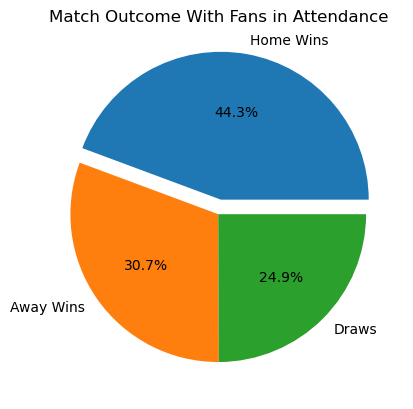

In [10]:
# Calculate % occurance of win/loss/draw
home_win_pct = (len(home_wins_df)/len(attendance_df['Home Score']))
away_win_pct = (len(away_wins_df)/len(attendance_df['Home Score']))
draw_pct = (len(draws_df)/len(attendance_df['Home Score']))

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct, away_win_pct, draw_pct 

plt.title("Match Outcome With Fans in Attendance")
plt.pie(values, labels=labels ,autopct='%1.1f%%', explode= [0.1,0,0])
plt.savefig('Data/attendance_pie')

In [11]:
# Get matches where attendance was 0 
covid_season_df = all_leagues_matches_cleaned_df.loc[all_leagues_matches_cleaned_df["Attendance"].isna()]
covid_season_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 1048 to 9625
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        2280 non-null   int64  
 1   Season       2280 non-null   object 
 2   Wk           2234 non-null   float64
 3   Date         2280 non-null   object 
 4   Time         2280 non-null   object 
 5   Home         2280 non-null   object 
 6   Away         2280 non-null   object 
 7   Home Score   2280 non-null   float64
 8   Away Score   2280 non-null   float64
 9   xG Home      2273 non-null   float64
 10  xG Away      2273 non-null   float64
 11  Attendance   0 non-null      float64
 12  Venue        2280 non-null   object 
 13  Referee      2275 non-null   object 
 14  xG Diff      2273 non-null   float64
 15  Actual Diff  2280 non-null   float64
 16  League       2280 non-null   object 
 17  Round        116 non-null    object 
dtypes: float64(8), int64(1), object(9)
memory usa

In [12]:
# Get matches where home team won during 2020-2021 season
home_wins_2_df = covid_season_df.loc[covid_season_df["Home Score"] > covid_season_df["Away Score"], :]
len(home_wins_2_df)

916

In [13]:
# Get matches where away team won during 2020-2021 season
away_wins_2_df = covid_season_df.loc[covid_season_df["Home Score"] < covid_season_df["Away Score"], :]
len(away_wins_2_df)

799

In [14]:
# Get matches where home team won during 2020-2021 season
draws_2_df = covid_season_df.loc[covid_season_df["Home Score"] == covid_season_df["Away Score"], :]
len(draws_2_df)

565

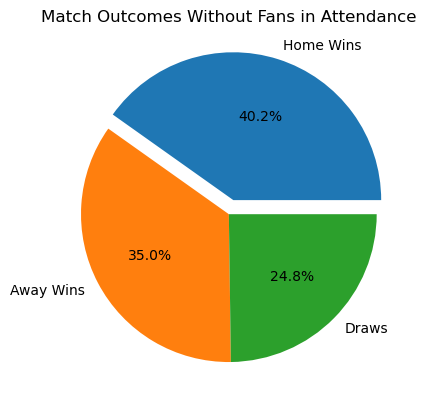

In [15]:
# Calculate % occurance of win/loss/draw
home_win_pct_2 = (len(home_wins_2_df)/len(covid_season_df['Home Score']))
away_win_pct_2 = (len(away_wins_2_df)/len(covid_season_df['Home Score']))
draw_pct_2 = (len(draws_2_df)/len(covid_season_df['Home Score']))

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct_2, away_win_pct_2, draw_pct_2 

plt.title("Match Outcomes Without Fans in Attendance")
plt.pie(values, labels=labels ,autopct='%1.1f%%', explode= [0.1,0,0])
plt.savefig('Data/attendance_pie_2')

## Home teams won 4.1% fewer games during the period where fans were not allowed to attend games in 2020-2021 season.

In [16]:
# Create new column for total goals in each match
all_leagues_matches_cleaned_df["Total Goals"] = all_leagues_matches_cleaned_df["Home Score"].astype(float) + all_leagues_matches_cleaned_df["Away Score"].astype(float)
all_leagues_matches_cleaned_df.head()

index     Season   Wk        Date   Time            Home            Away  \
0      0  2017-2018  1.0  2017-08-11  19:45         Arsenal  Leicester City   
1      1  2017-2018  1.0  2017-08-12  12:30         Watford       Liverpool   
2      2  2017-2018  1.0  2017-08-12  15:00  Crystal Palace    Huddersfield   
3      3  2017-2018  1.0  2017-08-12  15:00       West Brom     Bournemouth   
4      4  2017-2018  1.0  2017-08-12  15:00         Chelsea         Burnley   

   Home Score  Away Score  xG Home  xG Away  Attendance  \
0         4.0         3.0      2.5      1.5     59387.0   
1         3.0         3.0      2.1      2.6     20407.0   
2         0.0         3.0      1.1      1.5     25448.0   
3         1.0         0.0      1.3      0.5     25011.0   
4         2.0         3.0      1.5      0.6     41616.0   

                   Venue         Referee  xG Diff  Actual Diff League Round  \
0       Emirates Stadium       Mike Dean      1.0          1.0    EPL   NaN   
1  Vicarage Road Stadium  Anthony Taylor     -0.5          0.0    EPL   NaN   
2          Selhurst Park   Jonathan Moss     -0.4         -3.0    EPL   NaN   
3          The Hawthorns   Robert Madley      0.8          1.0    EPL   NaN   
4        Stamford Bridge    Craig Pawson      0.9         -1.0    EPL   NaN   

   Total Goals  
0          7.0  
1          6.0  
2          3.0  
3          1.0  
4          5.0

In [17]:
# Calculate quartiles & U/L bounds for potential outliers
quartiles = all_leagues_matches_cleaned_df["Total Goals"].quantile([0.25,0.5,0.75])
Q1 = quartiles[0.25]
Q3 = quartiles[0.75]
IQR = Q3-Q1

upper_bound = Q3 + (IQR*1.5)
lower_bound = Q1 - (IQR*1.5)

print(upper_bound)
print(lower_bound)

7.0
-1.0


In [18]:
# Get matches where final score is considered an outlier
outliers = all_leagues_matches_cleaned_df[(all_leagues_matches_cleaned_df['Total Goals'] < lower_bound) |
                                            (all_leagues_matches_cleaned_df['Total Goals'] > upper_bound)]
                                         

outliers

index     Season    Wk        Date   Time             Home  \
75       75  2017-2018   8.0  2017-10-14  15:00  Manchester City   
379     379  2017-2018  38.0  2018-05-13  15:00        Tottenham   
559     559  2018-2019  18.0  2018-12-23  16:00          Everton   
753     753  2018-2019  38.0  2019-05-12  15:00   Crystal Palace   
812     812  2019-2020   6.0  2019-09-21  15:00  Manchester City   
...     ...        ...   ...         ...    ...              ...   
9337   9438  2019-2020   4.0  2019-11-05  20:00          Chelsea   
9401   9502  2019-2020   NaN  2020-08-14  20:00        Barcelona   
9442   9543  2020-2021   3.0  2020-11-03  21:00      RB Salzburg   
9542   9643  2021-2022   1.0  2021-09-15  20:00  Manchester City   
9636   9737  2021-2022   NaN  2022-03-08  21:00    Bayern Munich   

                Away  Home Score  Away Score  xG Home  xG Away  Attendance  \
75        Stoke City         7.0         2.0      3.8      0.5     54128.0   
379   Leicester City         5.0         4.0      1.8      1.4     77841.0   
559        Tottenham         2.0         6.0      0.9      2.0     39319.0   
753      Bournemouth         5.0         3.0      2.8      1.6     25433.0   
812          Watford         8.0         0.0      5.9      0.4     54273.0   
...              ...         ...         ...      ...      ...         ...   
9337            Ajax         4.0         4.0      4.8      1.0     39132.0   
9401   Bayern Munich         2.0         8.0      1.1      5.3         NaN   
9442   Bayern Munich         2.0         6.0      1.8      2.9         NaN   
9542      RB Leipzig         6.0         3.0      2.3      1.3     38062.0   
9636     RB Salzburg         7.0         1.0      4.2      0.7     25000.0   

                                                 Venue           Referee  \
75                                      Etihad Stadium      Craig Pawson   
379                                    Wembley Stadium      Craig Pawson   
559                                      Goodison Park      Paul Tierney   
753                                      Selhurst Park        Roger East   
812                                     Etihad Stadium         Mike Dean   
...                                                ...               ...   
9337                                   Stamford Bridge   Gianluca Rocchi   
9401  Estádio do Sport Lisboa e Benfica (Neutral Site)     Damir Skomina   
9442                                    Red Bull Arena    Danny Makkelie   
9542                                    Etihad Stadium  Serdar Gözübüyük   
9636                                     Allianz Arena    Clément Turpin   

      xG Diff  Actual Diff League           Round  Total Goals  
75        3.3          5.0    EPL             NaN          9.0  
379       0.4          1.0    EPL             NaN          9.0  
559      -1.1         -4.0    EPL             NaN          8.0  
753       1.2          2.0    EPL             NaN          8.0  
812       5.5          8.0    EPL             NaN          8.0  
...       ...          ...    ...             ...          ...  
9337      3.8          0.0   UEFA     Group stage          8.0  
9401     -4.2         -6.0   UEFA  Quarter-finals         10.0  
9442     -1.1         -4.0   UEFA     Group stage          8.0  
9542      1.0          3.0   UEFA     Group stage          9.0  
9636      3.5          6.0   UEFA     Round of 16          8.0  

[69 rows x 19 columns]

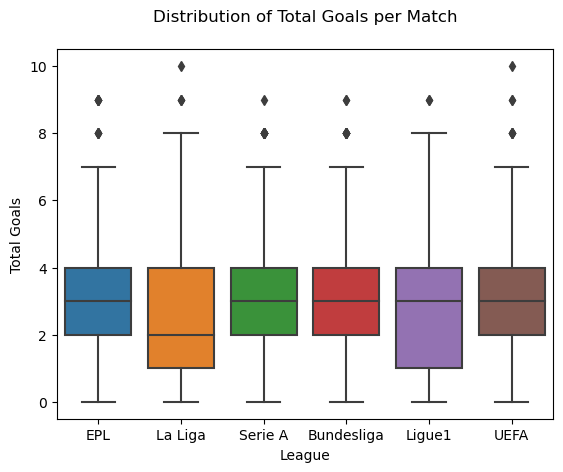

In [19]:
boxplot = sns.boxplot(data= all_leagues_matches_cleaned_df, x='League', y='Total Goals')
boxplot.set_title('Distribution of Total Goals per Match', pad=20)
plt.savefig('Data/boxplot.png')

### The median goals in the Spanish league is lower than the other 5 leagues, though it has a larger spread indicating some outliers matches where goal scored were >=9 and a right skewed distribution

In [20]:
# Remove comma from wages column to allow for conversion to float
all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].astype(str)
all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].map(lambda x: x.replace(',', ''))
all_leagues_sum_df['Annual Wages ($)'] = all_leagues_sum_df['Annual Wages ($)'].astype(float)
all_leagues_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Season            486 non-null    object 
 1   League Rank       486 non-null    int64  
 2   Squad             486 non-null    object 
 3   # of Players      486 non-null    int64  
 4   Avg Age           486 non-null    float64
 5   Avg Poss          486 non-null    float64
 6   MP                486 non-null    int64  
 7   W                 486 non-null    int64  
 8   D                 486 non-null    int64  
 9   L                 486 non-null    int64  
 10  GF                486 non-null    int64  
 11  GA                486 non-null    int64  
 12  GD                486 non-null    int64  
 13  Pts               486 non-null    int64  
 14  Pts/MP            486 non-null    float64
 15  xG                486 non-null    float64
 16  xGA               486 non-null    float64
 1

In [21]:
# Finding the mean for the numeric variables for each squad across all the seasons
mean_sum_df = all_leagues_sum_df.groupby('Squad')[['Avg Age','Annual Wages ($)','Avg Poss','Attendance','Pts','GF','GA',
                                                       'xG','xGA','xGD','GD']].mean()
mean_sum_df = mean_sum_df.rename(columns={'Avg Age':"Age",'Avg Poss':"Possession (%)",'Pts':"Points",'GF':"Goals For",
                                              'GA':"Goals Against",'xG':"xGoals For",'xGA':"xGoals Against",
                                              "GD":"Goal Differential",'xGD':"xGoal Differential",'Annual Wages ($)':"Avg Wages"})
mean_sum_df['Avg Wages(mill)']= mean_sum_df['Avg Wages']/1000000
mean_sum_df = mean_sum_df.round(2).reset_index()
mean_sum_df

Squad    Age    Avg Wages  Possession (%)  Attendance  Points  \
0          Ajaccio  30.00   2309378.00           45.30     6422.00   21.00   
1           Alavés  27.28  22370928.80           41.86    14817.25   41.00   
2           Amiens  27.00  12058638.00           44.90    10282.00   41.50   
3           Angers  27.40  12149626.20           45.96     9617.00   37.20   
4          Arminia  25.90  10303219.50           41.50     8547.00   31.50   
..             ...    ...          ...             ...         ...     ...   
131  Werder Bremen  26.60  34358841.25           48.05    26765.00   39.25   
132      West Brom  27.75  58417020.50           39.30    12401.50   28.50   
133       West Ham  27.80  89407711.80           45.80    43675.60   50.80   
134      Wolfsburg  25.62  63199947.40           50.52    16273.60   48.00   
135         Wolves  26.58  60791683.50           48.47    21716.50   53.00   

     Goals For  Goals Against  xGoals For  xGoals Against  xGoal Differential  \
0        21.00          55.00       33.70           41.00               -7.20   
1        36.00          56.20       39.76           54.76              -15.00   
2        34.00          47.00       34.10           52.35              -18.30   
3        38.60          55.60       44.04           48.84               -4.82   
4        26.50          52.50       29.60           59.80              -30.25   
..         ...            ...         ...             ...                 ...   
131      43.25          53.75       40.25           52.45              -12.23   
132      33.00          66.00       36.15           57.90              -21.70   
133      54.20          56.60       47.94           56.60               -8.66   
134      50.00          47.00       46.26           46.52               -0.26   
135      43.00          45.25       45.05           46.62               -1.55   

     Goal Differential  Avg Wages(mill)  
0               -34.00             2.31  
1               -20.20            22.37  
2               -13.00            12.06  
3               -17.00            12.15  
4               -26.00            10.30  
..                 ...              ...  
131             -10.50            34.36  
132             -33.00            58.42  
133              -2.40            89.41  
134               3.00            63.20  
135              -2.25            60.79  

[136 rows x 13 columns]

In [22]:
# Calculate average points earned per million dollars spent
pts_per_mil = mean_sum_df['Points'] / (mean_sum_df['Avg Wages(mill)'])
print(pts_per_mil)

0      9.090909
1      1.832812
2      3.441128
3      3.061728
4      3.058252
         ...   
131    1.142317
132    0.487847
133    0.568169
134    0.759494
135    0.871854
Length: 136, dtype: float64


In [23]:
# Add points per million spent column & get top 20 teams by this metric
mean_sum_df['Points per $ Million' ] = pts_per_mil
mean_sum_df = mean_sum_df.sort_values('Points per $ Million', ascending=False)
mean_sum_df.head(20)

Squad    Age    Avg Wages  Possession (%)  Attendance  Points  \
31   Clermont Foot  27.35   3654049.00           49.40    10498.50   38.00   
0          Ajaccio  30.00   2309378.00           45.30     6422.00   21.00   
11         Auxerre  28.20   4012543.00           44.10    14090.00   29.00   
70            Lens  26.50   8575017.67           52.77    33263.50   60.67   
75         Lorient  26.30   7958994.33           44.77    13126.50   41.00   
93           Nîmes  24.95   8767418.50           45.05    13994.00   44.00   
103          Reims  25.10  10685204.00           44.45    12072.67   47.50   
22           Brest  25.87   9055199.00           45.70    11521.50   39.00   
123         Troyes  26.83   7598560.67           43.60     9852.67   30.67   
86     Montpellier  26.96  12574777.60           47.14    12427.00   48.80   
2           Amiens  27.00  12058638.00           44.90    10282.00   41.50   
117     Strasbourg  27.10  12915243.40           48.22    24097.00   43.60   
83            Metz  26.33  11214305.00           44.53    10072.67   34.67   
3           Angers  27.40  12149626.20           45.96     9617.00   37.20   
4          Arminia  25.90  10303219.50           41.50     8547.00   31.50   
16          Bochum  28.00  13768197.00           44.70    14236.00   42.00   
25            Caen  26.55  11660168.50           44.75    16920.50   35.50   
35           Dijon  26.47  11565218.33           47.50    12636.00   34.33   
53        Guingamp  26.60  13069600.00           46.90    14616.50   37.00   
96    Paderborn 07  25.70   7143974.00           45.90    11038.00   20.00   

     Goals For  Goals Against  xGoals For  xGoals Against  xGoal Differential  \
31       34.50          55.00       39.40           50.35              -10.95   
0        21.00          55.00       33.70           41.00               -7.20   
11       27.00          51.00       31.50           44.10              -12.60   
70       55.67          41.33       53.00           40.60               12.40   
75       42.33          57.00       41.80           49.67               -7.90   
93       48.50          64.50       46.65           60.35              -13.70   
103      41.00          41.25       39.93           47.18               -7.22   
22       44.33          57.00       42.40           54.43              -11.97   
123      35.67          58.67       37.00           53.33              -16.30   
86       48.80          49.60       45.30           50.52               -5.24   
2        34.00          47.00       34.10           52.35              -18.30   
117      49.80          53.60       46.40           50.66               -4.26   
83       37.67          64.33       37.87           61.00              -23.20   
3        38.60          55.60       44.04           48.84               -4.82   
4        26.50          52.50       29.60           59.80              -30.25   
16       38.00          52.00       40.60           55.80              -15.10   
25       28.00          53.00       36.90           55.90              -19.00   
35       37.00          68.67       38.37           64.83              -26.50   
53       38.00          63.50       42.95           51.20               -8.20   
96       37.00          74.00       39.20           67.30              -28.10   

     Goal Differential  Avg Wages(mill)  Points per $ Million  
31              -20.50             3.65             10.410959  
0               -34.00             2.31              9.090909  
11              -24.00             4.01              7.231920  
70               14.33             8.58              7.071096  
75              -14.67             7.96              5.150754  
93              -16.00             8.77              5.017104  
103              -0.25            10.69              4.443405  
22              -12.67             9.06              4.304636  
123             -23.00             7.60              4.035526  
86               -0.80          

In [24]:
# Get bottom 20 teams by points per million dollars spent
mean_sum_df.tail(20)

Squad    Age    Avg Wages  Possession (%)  Attendance  Points  \
74         Liverpool  26.56  149067536.8           61.96    40435.20    86.4   
114      Southampton  25.96   73859079.0           48.66    23004.20    42.0   
119     Swansea City  27.20   58054764.0           45.30    20623.00    33.0   
133         West Ham  27.80   89407711.8           45.80    43675.60    50.8   
116       Stoke City  27.50   59609032.0           41.40    29280.00    33.0   
121        Tottenham  26.60  127294420.2           55.24    44616.20    68.0   
80   Manchester City  26.62  179932697.0           67.30    39719.40    91.6   
33    Crystal Palace  28.02   92044989.2           45.38    19067.40    45.6   
132        West Brom  27.75   58417020.5           39.30    12401.50    28.5   
9    Atlético Madrid  26.90  163951428.8           49.64    49799.50    76.4   
43           Everton  26.18  107874700.0           46.48    29100.40    50.0   
47            Fulham  25.60   62637256.5           49.25    12291.00    27.0   
29           Chelsea  26.58  175604562.4           60.32    30142.20    69.8   
61          Juventus  28.18  210186081.2           55.92    24988.60    83.2   
5            Arsenal  25.92  163805984.4           55.92    45421.60    63.8   
13     Bayern Munich  27.12  214600262.6           64.42    48108.80    79.8   
81    Manchester Utd  26.12  222433114.8           54.72    56113.00    69.0   
97         Paris S-G  26.86  294309377.8           63.28    43874.25    84.2   
12         Barcelona  27.16  297759978.4           64.66    62862.75    82.8   
101      Real Madrid  27.48  291618608.4           59.66    53742.75    80.2   

     Goals For  Goals Against  xGoals For  xGoals Against  xGoal Differential  \
74        84.0           32.2       74.34           35.42               38.92   
114       44.6           63.2       45.78           53.24               -7.44   
119       28.0           56.0       31.60           58.60              -27.00   
133       54.2           56.6       47.94           56.60               -8.66   
116       35.0           68.0       36.50           62.50              -26.00   
121       67.8           41.4       56.36           44.72               11.64   
80        97.0           28.6       82.36           27.90               54.42   
33        43.6           54.0       43.48           50.84               -7.40   
132       33.0           66.0       36.15           57.90              -21.70   
9         59.2           29.2       52.30           36.14               16.20   
43        46.4           54.8       45.58           50.38               -4.82   
47        30.5           67.0       40.90           60.40              -19.45   
29        65.6           40.0       61.60           34.46               27.14   
61        73.2           34.4       62.58           37.12               25.48   
5         63.8           47.4       57.54           49.20                8.36   
13        95.2           34.6       83.16           34.66               48.52   
81        65.8           43.8       59.04           44.70               14.34   
97        91.8           31.4       78.76           37.56               41.18   
12        85.6           35.8       72.50           40.14               32.36   
101       74.8           34.8       70.64           41.02               29.62   

     Goal Differential  Avg Wages(mill)  Points per $ Million  
74                51.8           149.07              0.579593  
114              -18.6            73.86              0.568643  
119              -28.0            58.05              0.568475  
133               -2.4            89.41              0.568169  
116              -33.0            59.61              0.553598  
121               26.4           127.29              0.534213  
80                68.4           179.93              0.509087  
33               -10.4            92.04              0.495437  
132              -33.0            58.42              0.4

In [25]:
# Creating function for plotting scatter plots
def scatter_plots(var1, var2, df):
    x_axis = df[var1]
    y_axis = df[var2]
    colors = np.random.rand(len(df[var2]))
    fig1, ax1 = plt.subplots()
    plt.title(f'{var2} vs {var1}')
    plt.scatter(x_axis, y_axis,c=colors, cmap='viridis')
    plt.xlabel(f'{var1}')
    plt.ylabel(f'{var2}')   

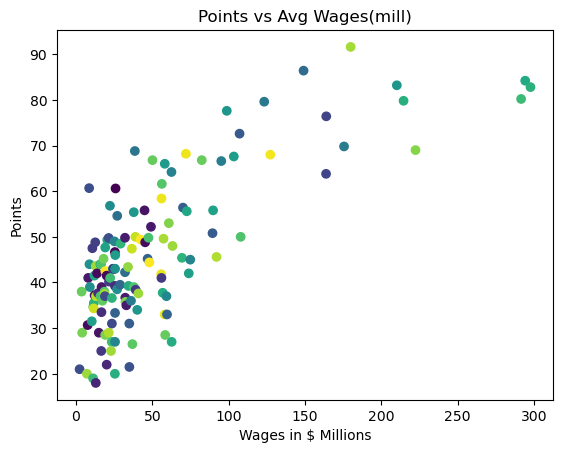

In [26]:
# Plot Points vs Wages
scatter_plots("Avg Wages(mill)","Points", mean_sum_df)
plt.xlabel('Wages in $ Millions')
plt.savefig('Data/pts_wages_scatter')

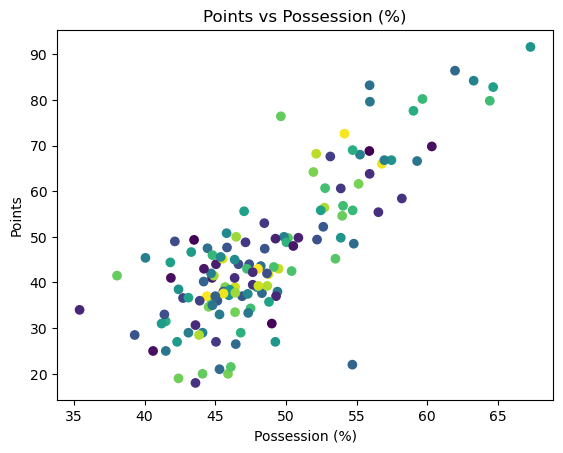

In [27]:
# Plot Points vs Possesion
scatter_plots("Possession (%)","Points", mean_sum_df)
plt.savefig('Data/pts_possession_scatter')

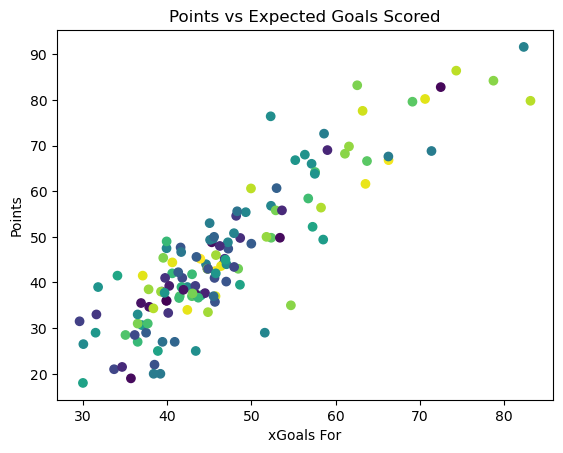

In [28]:
# Plot points vs  expected Goals Scored
scatter_plots("xGoals For","Points", mean_sum_df)
plt.title('Points vs Expected Goals Scored')
plt.savefig('Data/pts_xgoals_scatter')

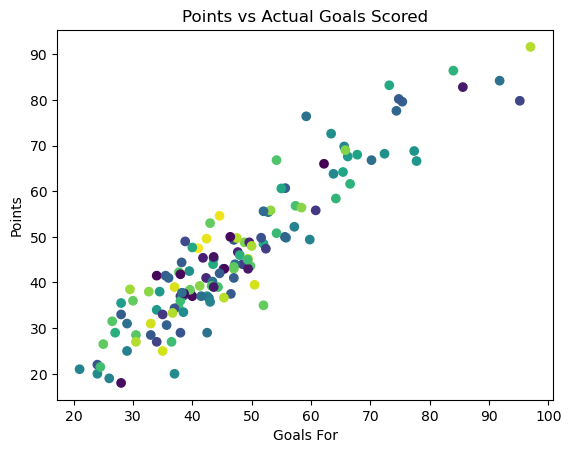

In [29]:
# Plot points vs actual goals scored
scatter_plots("Goals For","Points", mean_sum_df)
plt.title('Points vs Actual Goals Scored')
plt.savefig('Data/pts_goals_scatter')

Text(0.5, 1.0, 'Data/Points vs Expected Goals Against')

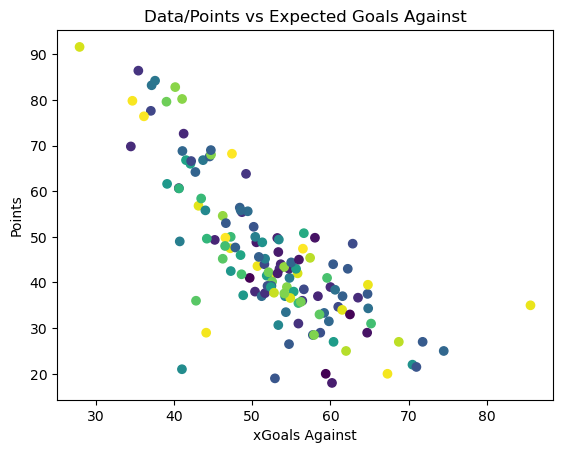

In [30]:
# Plot points vs  expected Goals Against
scatter_plots("xGoals Against","Points", mean_sum_df)
plt.title('Data/Points vs Expected Goals Against')

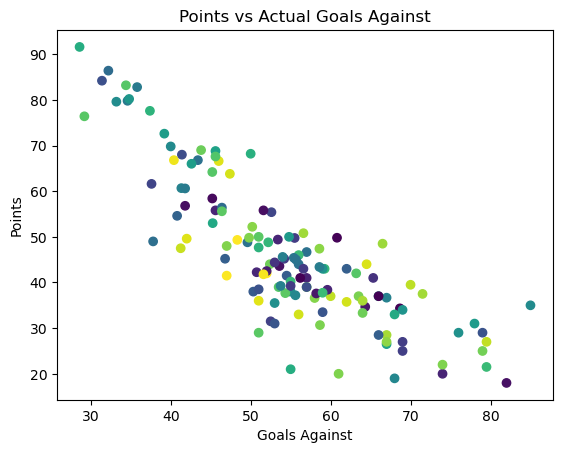

In [31]:
# Plot points vs actual goals against
scatter_plots("Goals Against","Points", mean_sum_df)
plt.title('Points vs Actual Goals Against')
plt.savefig('Data/pts_goals_against_scatter')

In [32]:
# Creating function for plotting Linear regression

def lin_regress_plot(var1, var2, df):
    scatter_plots(var1, var2, df)
    (slope, intercept, rvalue, pvalue, stderr)= linregress(df[var1], df[var2])
    regress_values= slope* df[var1] + intercept
    line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    plt.plot(df[var1], regress_values, color='r')
    plt.annotate(line_eq,(65,36), color='r', fontsize= 10, fontweight='bold')
    print(f"Correlation Coefficient r is {round(rvalue, 2)} and R-squared is {round(rvalue**2,2)}")

Correlation Coefficient r is 0.75 and R-squared is 0.56


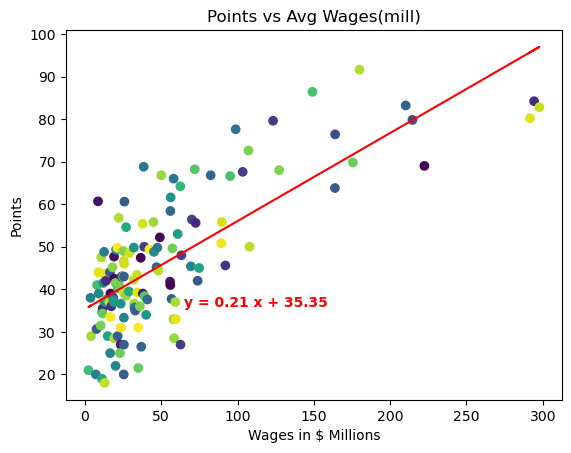

In [33]:
# Linear regression plot points vs wages
lin_regress_plot("Avg Wages(mill)","Points", mean_sum_df)
plt.xlabel('Wages in $ Millions')
plt.savefig('Data/pts_wages_lin_regress')

## Average squad wages shows a moderate correlation with points scored and explains only 0.56 variability  (r^2 =0.56) in points scored. It turns out money doesn't neccessarily buy wins!

Correlation Coefficient r is 0.8 and R-squared is 0.65


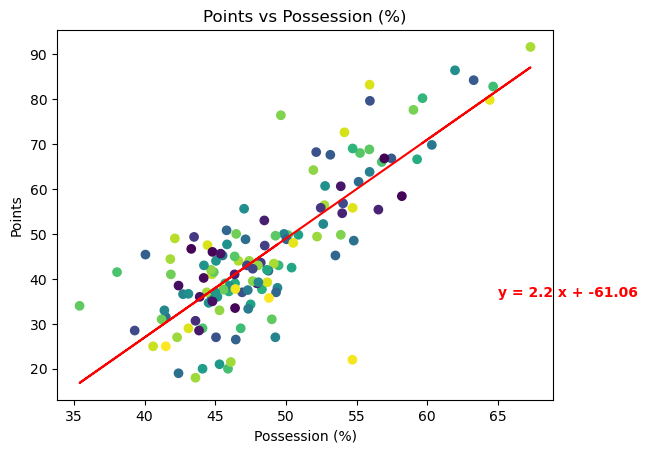

In [34]:
# Linear regression plot points vs possession
lin_regress_plot("Possession (%)","Points", mean_sum_df)
plt.savefig('Data/pts_poss_lin_regress')

## Ball possession shows a strong correlation(r=0.8) with points scored indicating teams with highest possession in a league tend to score more points

Correlation Coefficient r is 0.89 and R-squared is 0.79


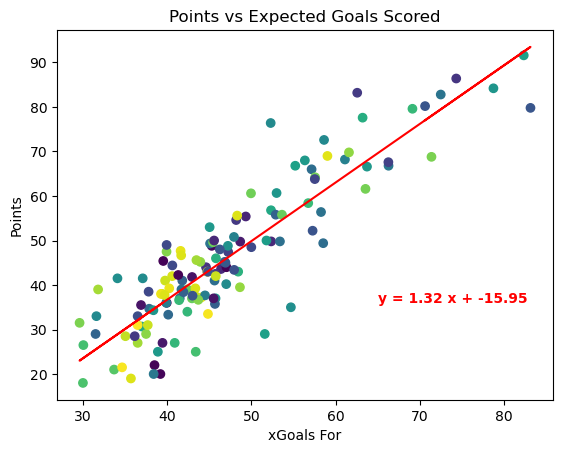

In [35]:
# Linear regression plot points vs expected goals scored
lin_regress_plot("xGoals For","Points", mean_sum_df)
plt.title('Points vs Expected Goals Scored')
plt.savefig('Data/pts_xgoals_lin_regress')

Correlation Coefficient r is 0.93 and R-squared is 0.86


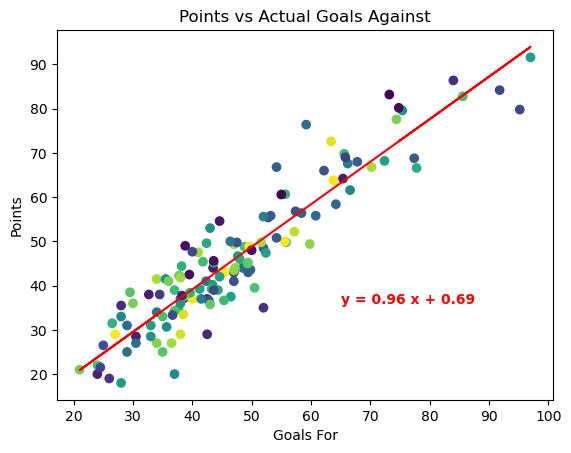

In [36]:
# Linear regression plot points vs actual goals scored
lin_regress_plot("Goals For","Points", mean_sum_df)
plt.title('Points vs Actual Goals Against')
plt.savefig('Data/pts_goals_lin_regress')

Correlation Coefficient r is -0.78 and R-squared is 0.6


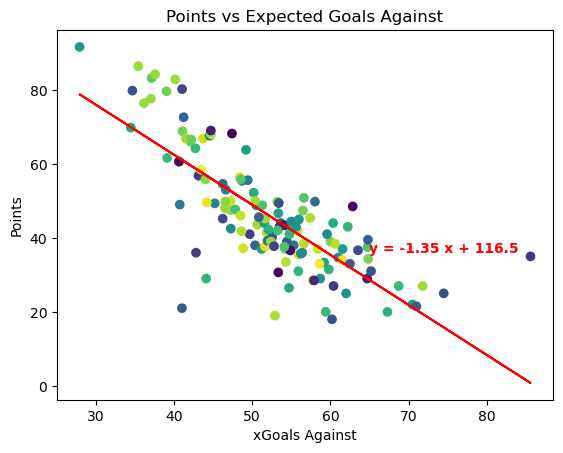

In [37]:
# Linear regression plot points vs expected goals against
lin_regress_plot("xGoals Against","Points", mean_sum_df)
plt.title('Points vs Expected Goals Against')
plt.savefig('Data/pts_xgoals_against_lin_regress')

Correlation Coefficient r is -0.84 and R-squared is 0.7


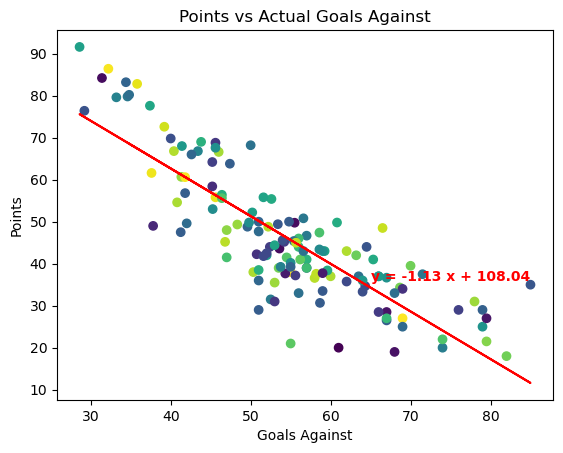

In [38]:
# Linear regression plot points vs actual goals against
lin_regress_plot("Goals Against","Points", mean_sum_df)
plt.title('Points vs Actual Goals Against')
plt.savefig('Data/pts_goals_against_lin_regress')

## Goals scored show the strongest correlation to team success (r^=0.85), moreso than goals conceded (r^=0.7). Based on this analysis we can say that teams who implement an offensive style of play are more likely to succeed relative to expectations compared to teams who play a defensive style. This makes sense when you consider that a teams margin of error becomes extremely small when fewer goals are scored in their games on average. 

## The expected metrics themselves are moderately correlated with team success (r^=0.78 and (r^=0.64) respectively. However, there is still a sizeable gap in the r^2 values of expected goals versus actual goals which signifys that these metrics are still far from perfect when it comes to predicting future performance.

In [39]:
# Groupby league & get average values for relevant variables
league_grouped_sum_df = all_leagues_sum_df.groupby('League')[['Avg Age','Annual Wages ($)']].mean()
league_grouped_sum_df= league_grouped_sum_df .rename(columns={'Avg Age':"Age",'Annual Wages ($)':"Avg Wages"})
league_grouped_sum_df['Avg Wages(mill)']= league_grouped_sum_df['Avg Wages']/1000000
league_grouped_sum_df= league_grouped_sum_df.round(2).reset_index()
league_grouped_sum_df 

League    Age    Avg Wages  Avg Wages(mill)
0  Bundesliga  25.92  49626033.78            49.63
1         EPL  26.72  97751930.50            97.75
2     La Liga  27.18  70343446.73            70.34
3      Ligue1  26.18  35196938.90            35.20
4     Serie A  26.94  58750198.84            58.75

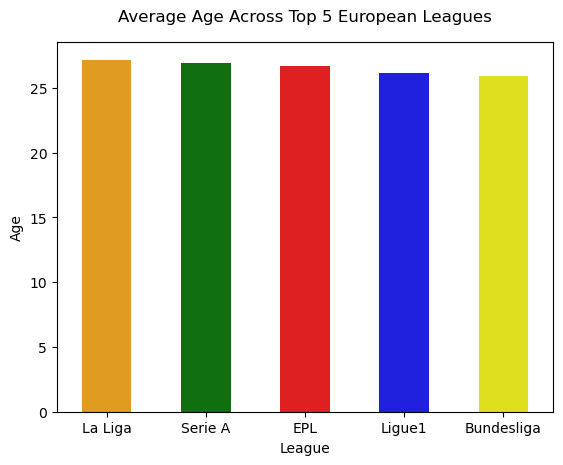

In [40]:
# Bar plot of age across each league
colors_team= {'Bundesliga':'yellow','EPL':'red','La Liga':'orange','Ligue1':'blue','Serie A':'green'}
plot_order_age = league_grouped_sum_df.sort_values('Age', ascending=False)['League']
bar_plot_age = sns.barplot(data=league_grouped_sum_df, x='League', y='Age', hue='League', palette=colors_team, 
            order= plot_order_age, width=0.5, dodge=False)
bar_plot_age.get_legend().remove()
bar_plot_age.set_title('Average Age Across Top 5 European Leagues', pad=15)
plt.savefig('Data/age_bar')

## There is no significant difference in average age of all teams in a league across the 5 leagues

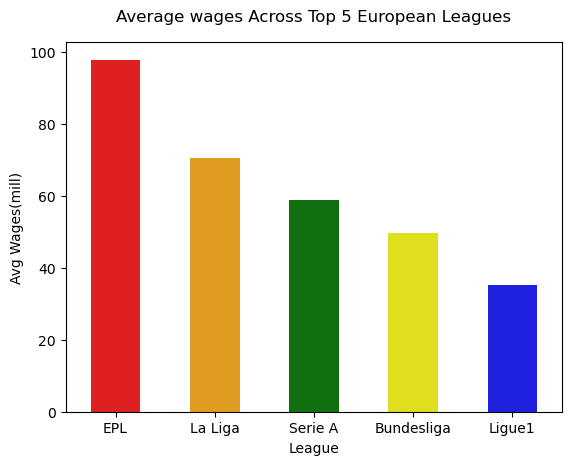

In [41]:
# Plot wages across each league
plot_order_wage = league_grouped_sum_df.sort_values('Avg Wages(mill)', ascending=False)['League']
bar_plot_wage = sns.barplot(data=league_grouped_sum_df, x='League', y='Avg Wages(mill)', hue='League', palette=colors_team, 
            order= plot_order_wage, width=0.5, dodge=False)
bar_plot_wage.get_legend().remove()
bar_plot_wage.set_title('Average wages Across Top 5 European Leagues', pad=15)
plt.savefig('Data/wages_bar')

In [42]:
# Groupby season
year_grouped = all_leagues_sum_df.groupby(['League', 'Season']).agg({'GF': 'sum', 'Annual Wages ($)': 'mean'})
year_grouped

GF  Annual Wages ($)
League     Season                           
Bundesliga 2017-2018   811      4.620808e+07
           2018-2019   942      5.129115e+07
           2019-2020   982      5.394498e+07
           2020-2021   928      5.053548e+07
           2021-2022   954      4.605309e+07
EPL        2017-2018  1018      9.202020e+07
           2018-2019  1072      9.747985e+07
           2019-2020  1034      9.448564e+07
           2020-2021  1024      1.012749e+08
           2021-2022  1071      1.034991e+08
La Liga    2017-2018   990      5.610859e+07
           2018-2019   946      7.013623e+07
           2019-2020   942      7.381299e+07
           2020-2021   953      7.742880e+07
           2021-2022   951      7.350853e+07
Ligue1     2017-2018  1033      3.021376e+07
           2018-2019   972      3.544119e+07
           2019-2020  1049      3.383145e+07
           2020-2021  1067      4.391250e+07
           2021-2022   842      3.258580e+07
Serie A    2017-2018  1017      4.363337e+07
           2018-2019  1019      6.253738e+07
           2019-2020  1154      6.322926e+07
           2020-2021  1163      6.438493e+07
           2021-2022  1089      5.996606e+07

In [43]:
# Remove multi-index
year_grouped = year_grouped.reset_index().rename(columns={'level_0': 'League', 'level_1': 'Season'})
year_grouped

League     Season    GF  Annual Wages ($)
0   Bundesliga  2017-2018   811      4.620808e+07
1   Bundesliga  2018-2019   942      5.129115e+07
2   Bundesliga  2019-2020   982      5.394498e+07
3   Bundesliga  2020-2021   928      5.053548e+07
4   Bundesliga  2021-2022   954      4.605309e+07
5          EPL  2017-2018  1018      9.202020e+07
6          EPL  2018-2019  1072      9.747985e+07
7          EPL  2019-2020  1034      9.448564e+07
8          EPL  2020-2021  1024      1.012749e+08
9          EPL  2021-2022  1071      1.034991e+08
10     La Liga  2017-2018   990      5.610859e+07
11     La Liga  2018-2019   946      7.013623e+07
12     La Liga  2019-2020   942      7.381299e+07
13     La Liga  2020-2021   953      7.742880e+07
14     La Liga  2021-2022   951      7.350853e+07
15      Ligue1  2017-2018  1033      3.021376e+07
16      Ligue1  2018-2019   972      3.544119e+07
17      Ligue1  2019-2020  1049      3.383145e+07
18      Ligue1  2020-2021  1067      4.391250e+07
19      Ligue1  2021-2022   842      3.258580e+07
20     Serie A  2017-2018  1017      4.363337e+07
21     Serie A  2018-2019  1019      6.253738e+07
22     Serie A  2019-2020  1154      6.322926e+07
23     Serie A  2020-2021  1163      6.438493e+07
24     Serie A  2021-2022  1089      5.996606e+07

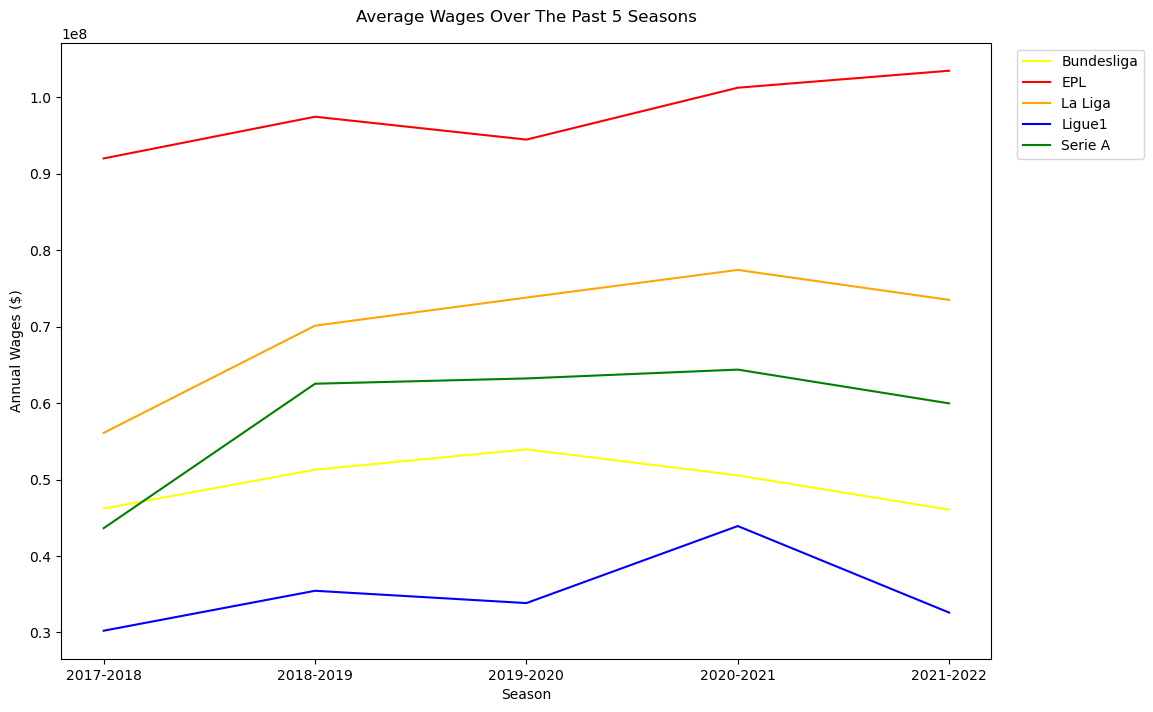

In [44]:
# Plot average wage in each league over the past 5 seasons
plt.figure(figsize=(12,8))
line_plot_wage = sns.lineplot(data=year_grouped, x='Season', y='Annual Wages ($)', hue='League', palette=colors_team)
line_plot_wage.set_title('Average Wages Over The Past 5 Seasons', pad= 15)
line_plot_wage.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.savefig('Data/wages_line')

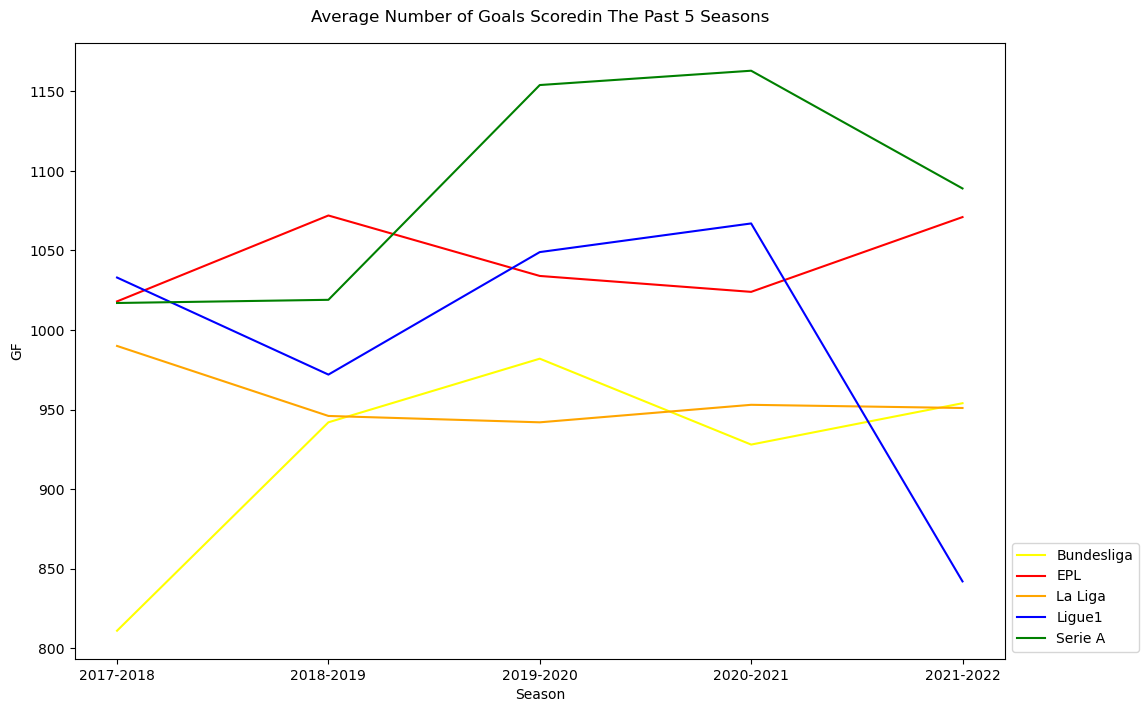

In [45]:
# Plot goals scored in each league over the past 5 seasons
plt.figure(figsize=(12,8))
line_plot_goal = sns.lineplot(data=year_grouped, x='Season', y='GF', hue='League', palette=colors_team)
line_plot_goal.set_title('Average Number of Goals Scoredin The Past 5 Seasons', pad= 15)
line_plot_goal.legend(bbox_to_anchor=(1,0), loc='lower left')
plt.savefig('Data/goals_line')